In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hannateshager/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hannateshager/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**X Data analysis**

In [ ]:
data = pd.read_csv("C:/Users/Heineken/Desktop/hanna/South_Africa_OR_Suid-Afrika_OR_Mzantsi_Afrika_OR.csv",
                encoding='cp1252', low_memory=False)

In [ ]:
#remove duplicate
data=data.drop_duplicates().reset_index().drop('index', axis=1)

In [ ]:
data.rename(columns={'Hit Sentence' :'tweet'},inplace=True)

In [ ]:
data.columns

Index(['Date', 'Headline', 'URL', 'Opening Text', 'tweet', 'Source',
       'Influencer', 'Country', 'Subregion', 'Language', 'Reach',
       'Desktop Reach', 'Mobile Reach', 'Twitter Social Echo',
       'Facebook Social Echo', 'Reddit Social Echo', 'National Viewership',
       'Engagement', 'AVE', 'Sentiment', 'Key Phrases', 'Input Name',
       'Keywords', 'Twitter Authority', 'Tweet Id', 'Twitter Id',
       'Twitter Client', 'Twitter Screen Name', 'User Profile Url',
       'Twitter Bio', 'Twitter Followers', 'Twitter Following',
       'Alternate Date Format', 'Time', 'State', 'City', 'Social Echo Total',
       'Editorial Echo', 'Views', 'Estimated Views', 'Likes', 'Replies',
       'Retweets', 'Comments', 'Shares', 'Reactions', 'Threads', 'Is Verified',
       'Parent URL', 'Document Tags', 'Document ID'],
      dtype='object')

In [ ]:
data.shape

(19664, 51)

In [ ]:
data.head()

,Date,Headline,URL,Opening Text,tweet,Source,Influencer,Country,Subregion,Language,...,Replies,Retweets,Comments,Shares,Reactions,Threads,Is Verified,Parent URL,Document Tags,Document ID
0,19-Mar-2024 05:53PM,NaN,https://twitter.com/FarookAfolabi/statuses/177...,RT @AreaFada1: This is the former president of...,RT @AreaFada1: This is the former president of...,Twitter,@farookafolabi,Unknown,NaN,English,...,NaN,NaN,NaN,NaN,NaN,NaN,False,https://twitter.com/AreaFada1/statuses/1769798...,NaN,"""1710860017000_t6ntXYwWqDTdfZY2v2kYRYjUw0sA"""
1,19-Mar-2024 05:53PM,NaN,https://twitter.com/LaureenBertin/statuses/177...,RT @ME_Beaumont: President Ramaphosa is treati...,RT @ME_Beaumont: President Ramaphosa is treati...,Twitter,@laureenbertin,South Africa,NaN,English,...,NaN,NaN,NaN,NaN,NaN,NaN,False,https://twitter.com/ME_Beaumont/statuses/17700...,NaN,"""1710860004000_1VlwU2JQpHAYoZXguJCDhjC43HEA"""
2,19-Mar-2024 05:53PM,NaN,https://twitter.com/YOMMAX01/statuses/17701012...,RT @AreaFada1: This is the former president of...,RT @AreaFada1: This is the former president of...,Twitter,@yommax01,Unknown,NaN,English,...,NaN,NaN,NaN,NaN,NaN,NaN,False,https://twitter.com/AreaFada1/statuses/1769798...,NaN,"""1710860000000_I-wUv8qg6U9U4sxprmaOgNX6ctUA"""
3,19-Mar-2024 05:53PM,NaN,https://twitter.com/Simphiw20882629/statuses/1...,RT @KennyMbamboma1: MKP AND ACT ARE AXIS FOR R...,RT @KennyMbamboma1: MKP AND ACT ARE AXIS FOR R...,Twitter,@simphiw20882629,Unknown,NaN,English,...,NaN,NaN,NaN,NaN,NaN,NaN,False,https://twitter.com/KennyMbamboma1/statuses/17...,NaN,"""1710859987000_1iNmxhPZkrztyWzhyvaQ3-cPE_EA"""
4,19-Mar-2024 05:53PM,NaN,https://twitter.com/nompuku_r/statuses/1770101...,RT @goolammv: According to senior ANC leaders ...,RT @goolammv: According to senior ANC leaders ...,Twitter,@nompuku_r,Unknown,NaN,English,...,NaN,NaN,NaN,NaN,NaN,NaN,False,https://twitter.com/goolammv/statuses/17699618...,NaN,"""1710859983000_tUynFrFaWxfdh-1mNDUMs6KYvpcA"""


In [ ]:
 #remove tweets with phone numbers
data=data.copy()
k=[]
for i in range(data.shape[0]):
    if re.findall("\d{10}|\d{9}", data.loc[i, 'tweet'])!=[]:
        k.append(re.findall("\d{10}|\d{9}", data.loc[i, 'tweet'])[0])
for j in k:
    data=data[~data['tweet'].str.contains(j)].reset_index().drop('index', axis=1)

In [ ]:
data.tweet = data.apply(lambda row: re.sub(r"http\S+", "", row.tweet).lower(), 1) #remove links inside the tweets
data.tweet = data.apply(lambda row: re.sub(r"\\n", ",", row.tweet).lower(), 1) #remove tabulation inside the tweets
data.tweet= data.apply(lambda row: re.sub(r"\\r", ",", row.tweet).lower(), 1) #remove tabulation inside the tweets
data.tweet = data.apply(lambda row: re.sub(r"\\t", ",", row.tweet).lower(), 1) #remove tabulation inside the tweets

In [ ]:
#Find out most used hashtag
hashtags = data.tweet.str.extractall('(#\w+)')


hashtags[0].value_counts()[:30]

0
#malemaforsapresident           374
#votemk2024                     184
#rescuesa                       144
#effmustrise                    136
#voteda                         102
#2024isour1994                  102
#phalaphalafarmgate              97
#cr17bankstatements              86
#efffreestatemanifestolaunch     73
#unsecuritycouncil               62
#freecongo                       52
#voteeff2024                     46
#thegathering24                  38
#zuma                            37
#malema                          35
#votemk                          32
#humanrightsmonth2024            31
#trackingthabobester             31
#anc                             27
#pirates                         27
#sabcnews                        27
#humanrightsconferencesa         26
#votemk_29may2024                26
#earthquake                      22
#denelarmsdeal                   20
#papaghost                       20
#tintswalo                       20
#kleptocracy              

In [ ]:
#TOP MENTIONS
mentions = data.tweet.str.extractall('(@\w+)')
mentions[0].value_counts()[:20]

0
@mdnnewss           1818
@stats_feed         1192
@effsouthafrica     1096
@areafada1           951
@julius_s_malema     817
@nyebe_official      746
@gentlements         613
@constitution_94     529
@goolammv            440
@miz_ruraltarain     431
@moyaprof            426
@patricia_bantom     385
@news24              376
@newslivesa          376
@thisiscolbert       344
@naledichirwa        342
@jsteenhuisen        333
@mzwanelemanyi       322
@amukelanimoyani     301
@our_da              277
Name: count, dtype: int64

In [ ]:
#Top 10 Languages of Tweets
data['Language'].value_counts()[:10]

Language
English                  19483
Maori                       27
Portuguese                  25
Afrikaans                   21
Indonesian                  19
Malay (macrolanguage)       10
Turkish                      9
Waray (Philippines)          8
Cebuano                      7
Spanish                      6
Name: count, dtype: int64

In [ ]:
#sources(accounts) that recived more than 1000k retweets
source=data['source'].value_counts().loc[lambda x: x>100]

In [ ]:
#we have 196 accounts that recived the most number of retweets
source.shape

In [ ]:
#top 10 accounts
source.head(10)

In [ ]:
pd.options.display.max_colwidth = 200
data['tweet'].value_counts().rename_axis('Tweets').reset_index(name='counts')[:20]

,Tweets,counts
0,"rt @mdnnewss: julius malema ?? malema: ""i'm not desperate to become president of south africa"" ""i'm desperate to unite the african continent and if that unity will cost me votes, you can take your...",1039
1,rt @stats_feed: the most common last name: ???? argentina ? gonzalez ???? australia ? smith ???? bangladesh ? akter ???? brazil ? da silva ???? canada ? smith ???? china ? wang ???? egypt ? mohame...,924
2,"rt @areafada1: this is the former president of south africa, mr jacob zuma, in his prison uniform, queue for food with fellow inmates in a south african prison. we must take our democracy to this ...",884
3,rt @effsouthafrica: ??in pictures?? cic @julius_s_malema meeting with international investors at rand merchant bank to reflect on the eff manifesto and the role of the private sector once the eff ...,663
4,"rt @nyebe_official: malema : south africa does not manufacture cars because of the agreements it has with germany. guys, is this true? are there south african companies manufacturing cars? or are ...",659
5,"rt @gentlements: ??breaking news ??the anc of ramaphosa has privatized eskom. ""energy regulator approves transfer of eskom powers and duties to national transmission company south africa."" ...",483
6,"rt @constitution_94: thabo mbeki the reason we are in this mess in south africa it is because of, amongst others, counter revolutionary people like jacob zuma. these are people who never wanted th...",432
7,"rt @patricia_bantom: you can hate me, insult me, scandalized my name, smear campaign me, call me all sorts of names, but julius malema will never be the president of south africa. ...",331
8,rt @naledichirwa: da has been running tshwane for 8 years and still gets negative qualified opinion audits but media insists to discuss eff ekurhuleni’s clean audit after a year in gov; they even ...,327
9,"rt @miz_ruraltarain: it's a duty of each country to prioritize it's citizens, but i wish julius malema was this energetic when other african countries like ghana reserved certain economic sectors ...",313


In [ ]:
data_retweets=data[data['tweet'].str.startswith('rt')].reset_index().drop('index', axis=1)# retweets dataset
import re

# Extract retweeted accounts
data_retweets['retweeted'] = data_retweets['tweet'].apply(lambda x: re.findall('rt @([_a-zA-Z-0123456789]+)', x))

# Remove retweet symbol "rt" and the account name inside the tweets of retweets dataset
data_retweets['tweet'] = data_retweets['tweet'].apply(lambda row: re.sub(r"rt @\S+", "", row).lower())

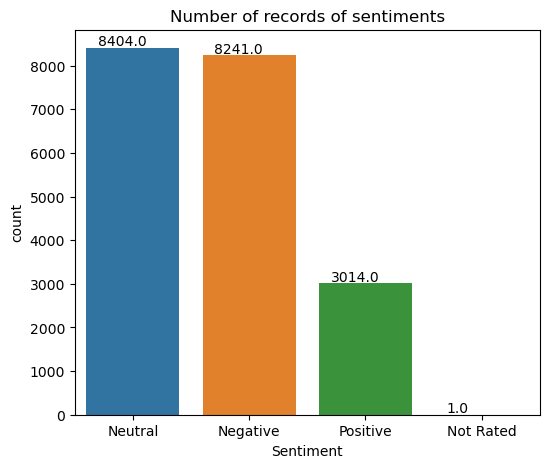

In [ ]:
plt.figure(figsize=(6,5))
plt.title("Number of records of sentiments")
plot = sns.countplot(x = 'Sentiment', data=data)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+0.1 ,p.get_height()+50))

In [ ]:
#filter by language
#data_retweets['Language'].value_counts().plot.pie()
data=data[data['Language'].str.contains("English")].reset_index().drop('index', axis=1)
data_retweets=data_retweets[data_retweets['Language'].str.contains("English")].reset_index().drop('index', axis=1)

In [ ]:
for i in range(data.shape[0]):
    data.loc[i, 'Count']=1

In [ ]:
#Checking for Days with highest tweet activity
import altair as alt
data_Ls=data.pivot_table(values=['Count'], index='Alternate Date Format', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(30)
alt.Chart(data_Ls).mark_bar().encode(x='Alternate Date Format:N', y=alt.Y('Count', sort='-x'), color='Alternate Date Format', tooltip=['Alternate Date Format']).interactive()

C:\Users\Heineken\AppData\Local\Temp\ipykernel_10928\2527158134.py:3: FutureWarning: The provided callable <function sum at 0x000001FEFDE2CCC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['Count'], index='Alternate Date Format', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(30)
C:\Users\Heineken\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
#Check tweet samples on days with highest number of tweets
daily = data[data['Alternate Date Format'].str.contains('Mar 16, 2024|Mar 17, 2024')]

In [ ]:
daily.shape

(0, 52)

In [ ]:
#percentage of all tweets tweeted within Oct 17 and 16, 2024
(daily.shape[0]/data.shape[0]) * 100

In [ ]:
#Most Shared Message/Information within Oct 17 and 16
# Check if the 'Count' column exists in the DataFrame
if 'Count' not in data.columns:
    # If not, create the 'Count' column by counting the number of occurrences of each tweet
    data['Count'] = data['tweet'].map(data['tweet'].value_counts())

# Create the pivot table
data_Ls = data.pivot_table(values=['Count'], index='tweet', aggfunc='sum').reset_index().sort_values('Count', ascending=False).head(15)

# Create the bar chart
alt.Chart(data_Ls).mark_bar().encode(x='Count', y=alt.Y('tweet:N', sort='-x'), color='tweet', tooltip=['tweet']).interactive()

C:\Users\Heineken\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
data_retweets.shape

(1, 52)

In [ ]:
#Check tweets days with highest number of retweets
rt_mask = data_retweets[data_retweets['Alternate Date Format'].str.contains('Mar 2, 2024|Oct 13, 2024')]

In [ ]:
rt_mask.shape

In [ ]:
#Percentage of retweets made between Oct 12 and 13, 2021
(rt_mask.shape[0]/data_retweets.shape[0]) *100

In [ ]:
#Most Retweeted tweets between highest rt days
data_Ls=rt_mask.pivot_table(values=['Count'], index='tweets', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='Count', y=alt.Y('tweets:N', sort='-x'), color='tweets', tooltip=['tweets']).interactive()

In [ ]:
#Most Retweeted accounts
data_Ls=rt_mask.pivot_table(values=['Count'], index='retweeted', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='Count', y=alt.Y('retweeted:N', sort='-x'), color='retweeted', tooltip=['retweeted']).interactive()

In [ ]:
Profile=pd.DataFrame()
j=0
for i in L:
    test = api.lookup_users(screen_names=[i])
    users = api.get_user(i)
    #\test.screen_name
    #test.name
    #test.description
    #test.statuses_count
    for user in test:
        Profile.loc[j, "Name"]=user.screen_name
        Profile.loc[j, "Description"]=user.description
        Profile.loc[j, "Creation"]=users.created_at.strftime("%m/%d/%Y, %H:%M:%S")
        Profile.loc[j, "Followings"]=user.friends_count
        Profile.loc[j, "Followers"]=user.followers_count
    j=j+1

In [ ]:
Profile

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = word_tokenize(str(text))
    words = [word.lower() for word in words if word.isalpha() and word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

data['clean_text'] = data['text'].apply(preprocess_text)

**Facebook data analysis**

In [ ]:
#data = pd.read_csv("path to the file", low_memory=False)
data1 = pd.read_csv("path to the file", low_memory=False)
#data2 = pd.read_csv("path to the file", low_memory=False)

In [ ]:
#Remove duplicates
data=data.drop_duplicates().reset_index().drop('index', axis=1)

In [ ]:
#Remove duplicates
data1=data1.drop_duplicates().reset_index().drop('index', axis=1)

In [ ]:
for i in range(data.shape[0]):
    data.loc[i, 'Count']=1

In [ ]:
for i in range(data1.shape[0]):
    data1.loc[i, 'Count']=1

In [ ]:
data.columns

Index(['Page Name', 'User Name', 'Facebook Id', 'Page Category',
       'Page Admin Top Country', 'Page Description', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created',
       'Post Created Date', 'Post Created Time', 'Type', 'Total Interactions',
       'Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry',
       'Care', 'Video Share Status', 'Is Video Owner?', 'Post Views',
       'Total Views', 'Total Views For All Crossposts', 'Video Length', 'URL',
       'Message', 'Link', 'Final Link', 'Image Text', 'Link Text',
       'Description', 'Sponsor Id', 'Sponsor Name', 'Sponsor Category',
       'Total Interactions (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'Overperforming Score', 'Count'],
      dtype='object')

In [ ]:
data.shape

(148, 42)

In [ ]:
data1.shape

(71, 42)

In [ ]:
data.dropna(axis=1)

,Page Name,Facebook Id,Likes at Posting,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,...,Care,Is Video Owner?,Post Views,Total Views,Total Views For All Crossposts,URL,Link,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,Count
0,Présidence du Faso,100064764636910,592983,2024-06-05 15:59:48 EAT,2024-06-05,15:59:48,Photo,"4,917",4002,278,...,28,-,0,0,0,https://www.facebook.com/100064764636910/posts...,https://www.facebook.com/photo.php?fbid=855744...,"4,917",1.63,1.0
1,J'aime mon pays le Burkina Faso,100084182213175,96614,2024-06-05 16:13:08 EAT,2024-06-05,16:13:08,Photo,"1,976",1749,65,...,9,-,0,0,0,https://www.facebook.com/100084182213175/posts...,https://www.facebook.com/photo.php?fbid=440345...,"1,976",1.27,1.0
2,Gandhi Malien,100044665413689,1061375,2024-06-05 16:05:01 EAT,2024-06-05,16:05:01,Photo,"1,972",1781,54,...,13,-,0,0,0,https://www.facebook.com/100044665413689/posts...,https://www.facebook.com/photo.php?fbid=100396...,"1,972",-1.37,1.0
3,Les Editions Sidwaya,100064709527661,94136,2024-06-05 16:33:43 EAT,2024-06-05,16:33:43,Photo,"1,584",1366,59,...,7,-,0,0,0,https://www.facebook.com/100064709527661/posts...,https://www.facebook.com/photo.php?fbid=882817...,"1,584",2.46,1.0
4,RTB,100064470740758,513278,2024-06-05 17:12:56 EAT,2024-06-05,17:12:56,Photo,"1,346",1206,27,...,5,-,0,0,0,https://www.facebook.com/100064470740758/posts...,https://www.facebook.com/photo.php?fbid=897367...,"1,346",-1.10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Zone jeunesse��,2689077317987629,7881,2024-06-05 17:31:55 EAT,2024-06-05,17:31:55,Photo,0,0,0,...,0,-,0,0,0,https://www.facebook.com/groups/26890773179876...,https://www.facebook.com/photo.php?fbid=428567...,0,-20.00,1.0
144,Radio Pulsar Ouaga,100063522612494,32641,2024-06-05 20:16:55 EAT,2024-06-05,20:16:55,Link,0,0,0,...,0,-,0,0,0,https://www.facebook.com/100063522612494/posts...,https://www.monpulsar.com/index.php?option=com...,0,-26.00,1.0
145,Les fans du prince Moussa Thorantcha,825471507938514,3435,2024-06-05 18:59:24 EAT,2024-06-05,18:59:24,Photo,0,0,0,...,0,-,0,0,0,https://www.facebook.com/groups/82547150793851...,https://www.facebook.com/photo.php?fbid=189180...,0,-20.00,1.0
146,L'OEIL SUR LE CAMEROON,153634035274617,1484,2024-06-05 16:50:41 EAT,2024-06-05,16:50:41,Photo,0,0,0,...,0,-,0,0,0,https://www.facebook.com/groups/15363403527461...,https://www.facebook.com/photo.php?fbid=855744...,0,-26.00,1.0


In [ ]:
data1.dropna(axis=1)

,Page Name,Facebook Id,Page Category,Likes at Posting,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Is Video Owner?,Post Views,Total Views,Total Views For All Crossposts,URL,Link,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,Count
0,RTB,100064470740758,MEDIA_NEWS_COMPANY,513278,2024-06-05 22:04:36 EAT,2024-06-05,22:04:36,Photo,"4,516",4094,135,167,95,0,2,0,0,23,-,0,0,0,https://www.facebook.com/100064470740758/posts/897538992405117,https://www.facebook.com/photo.php?fbid=897538799071803&set=a.600963012062718&type=3,"4,516",3.04,1.0
1,Présidence du Faso,100064764636910,GOVERNMENT_ORGANIZATION,592983,2024-06-05 19:37:21 EAT,2024-06-05,19:37:21,Photo,"4,052",3465,149,255,161,0,0,0,0,22,-,0,0,0,https://www.facebook.com/100064764636910/posts/855873213248159,https://www.facebook.com/photo.php?fbid=855872019914945&set=a.293414679494018&type=3,"4,052",1.35,1.0
2,Service d'Information du Gouvernement,100064717807634,GOVERNMENT_ORGANIZATION,355784,2024-06-05 19:55:36 EAT,2024-06-05,19:55:36,Photo,605,546,11,20,22,0,0,0,0,6,-,0,0,0,https://www.facebook.com/100064717807634/posts/889791906521395,https://www.facebook.com/photo.php?fbid=889791673188085&set=a.303579748475950&type=3,605,-1.18,1.0
3,Burkina 24,100064277636371,MEDIA_NEWS_COMPANY,825690,2024-06-05 20:09:36 EAT,2024-06-05,20:09:36,Photo,449,398,7,31,13,0,0,0,0,0,-,0,0,0,https://www.facebook.com/100064277636371/posts/870440101775236,https://www.facebook.com/photo.php?fbid=870441275108452&set=a.603868078432441&type=3,449,1.04,1.0
4,La plume,100088992227950,MEDIA_NEWS_COMPANY,83200,2024-06-05 20:16:14 EAT,2024-06-05,20:16:14,Photo,266,249,2,6,7,0,1,0,0,1,-,0,0,0,https://www.facebook.com/100088992227950/posts/439938485649222,https://www.facebook.com/photo.php?fbid=439937845649286&set=a.128769840099423&type=3,266,1.86,1.0
5,Radar Du Faso Infos,100063861791285,MEDIA_NEWS_COMPANY,120840,2024-06-05 20:54:09 EAT,2024-06-05,20:54:09,Photo,216,158,6,50,2,0,0,0,0,0,-,0,0,0,https://www.facebook.com/100063861791285/posts/913044874167564,https://www.facebook.com/photo.php?fbid=913043974167654&set=a.316244037180987&type=3,216,-1.49,1.0
6,faso-actu.net,100063679564804,NEWS_SITE,33779,2024-06-05 21:18:30 EAT,2024-06-05,21:18:30,Photo,151,142,0,5,4,0,0,0,0,0,-,0,0,0,https://www.facebook.com/100063679564804/posts/977354917730485,https://www.facebook.com/photo.php?fbid=977354767730500&set=a.440737844725531&type=3,151,-1.23,1.0
7,Quotidien Numérique BF,100064510339505,TOPIC_NEWSPAPER,420030,2024-06-05 20:05:15 EAT,2024-06-05,20:05:15,Photo,110,100,5,3,2,0,0,0,0,0,-,0,0,0,https://www.facebook.com/100064510339505/posts/850794230414247,https://www.facebook.com/photo.php?fbid=850793953747608&set=a.589952466498426&type=3,110,-1.32,1.0
8,Burkina infos 24/24,3265030973584466,none,245054,2024-06-05 19:56:54 EAT,2024-06-05,19:56:54,Photo,80,78,1,1,0,0,0,0,0,0,-,0,0,0,https://www.facebook.com/groups/3265030973584466/permalink/7837951269625724,https://www.facebook.com/photo.php?fbid=1839893413156714&set=gm.7837951266292391&type=3,80,1.05,1.0
9,BurkinaWeb.net,100063759473864,MEDIA_NEWS_COMPANY,44458,2024-06-05 23:51:42 EAT,2024-06-05,23:51:42,Photo,75,70,0,4,0,0,0,0,0,1,-,0,0,0,https://www.facebook.com/100063759473864/posts/988874226581217,https://www.facebook.com/photo.php?fbid=988873999914573&set=a.377043117764334&type=3,75,-1.89,1.0


In [ ]:
#Remove links
data['Message'] = data['Message'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
#Remove links
data1['Message'] = data1['Message'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
## WordCloud of Facebook Posts
stop_words = get_stop_words('english')# if posts are in french otherwise use STOPWORDS
#from stop_words import safe_get_stop_words
#stop_words = safe_get_stop_words('unsupported language')
text = ' '.join([str(x) for x in data['Message'].values if pd.notnull(x)])
wc = WordCloud(stopwords=stop_words,background_color='white',max_words=200,scale=3).generate(text)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(wc)
plt.show()
#stop_words = get_stop_words('french') + get_stop_words('english')

In [ ]:
#Checking for Days with highest post activity
data_Ls=data.pivot_table(values=['Count'], index='Post Created Date', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(30)
alt.Chart(data_Ls).mark_bar().encode(x='Post Created Date:N', y=alt.Y('Count', sort='-x'), color='Post Created Date', tooltip=['Post Created Date']).interactive()

/var/folders/gx/8rktpgxj6xz246n3bb3g7k3c0000gp/T/ipykernel_30587/263972244.py:2: FutureWarning: The provided callable <function sum at 0x111bb5440> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['Count'], index='Post Created Date', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(30)
/Applications/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
#Create total interactions variable
for i in range(data.shape[0]):
    data.loc[i,'interactions']=data.loc[i,'Likes']+data.loc[i,'Comments']+data.loc[i,'Shares']+data.loc[i,'Love']+data.loc[i,'Wow']+data.loc[i,'Haha']+data.loc[i,'Sad']+data.loc[i,'Angry']+data.loc[i,'Care']

In [ ]:
# Top 15 posts with high number of Total Interactions
data_Ls=data.pivot_table(values=['interactions'], index='Message', aggfunc=np.sum).reset_index().sort_values('interactions', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='interactions', y=alt.Y('Message:N', sort='-x'), color='Message', tooltip=['Message']).interactive()

/var/folders/gx/8rktpgxj6xz246n3bb3g7k3c0000gp/T/ipykernel_30587/2470508865.py:2: FutureWarning: The provided callable <function sum at 0x111bb5440> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['interactions'], index='Message', aggfunc=np.sum).reset_index().sort_values('interactions', ascending=False).head(15)
/Applications/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
## print table with Message and their links
table=pd.DataFrame()
for i in range(15):
    table.loc[i, 'Message']=data_Ls.reset_index().drop('index', axis=1).loc[i, 'Message']
    k=data_Ls.reset_index().drop('index', axis=1).loc[i, 'Message']
    l=data[data['Message']==k]['URL'].tolist()
    table.loc[i, 'Link']=l[0]# you can take every number in range(len(l)) incase an url doesn't open
table

,Message,Link
0,Coopération Burkina-Fédération de Russie : le ...,https://www.facebook.com/100064764636910/posts...
1,#Coopération Burkina-Fédération de Russie : le...,https://www.facebook.com/100044665413689/posts...
2,Coopération Burkina-Fédération de Russie : le ...,https://www.facebook.com/100084182213175/posts...
3,Coopération Burkina-Fédération de Russie : le ...,https://www.facebook.com/100064709527661/posts...
4,nan,https://www.facebook.com/100057064286555/posts...
5,🛑Coopération Burkina-Fédération de Russie : le...,https://www.facebook.com/100064470740758/posts...
6,🔴Coopération Burkina-Fédération de Russie : Le...,https://www.facebook.com/100064277636371/posts...
7,Coopération Burkina-Fédération de Russie : le ...,https://www.facebook.com/100047242891526/posts...
8,#Coopération Burkina-Fédération de #Russie : l...,https://www.facebook.com/100064717807634/posts...
9,Coopération Burkina-Fédération de Russie : le ...,https://www.facebook.com/100066955383681/posts...


In [ ]:
# Top 15 posts with high number of Total Interactions and reshares
#This accounts for posts that are direct shares with no added caption or message
data_Ls=data.pivot_table(values=['interactions'], index='Description', aggfunc=np.sum).reset_index().sort_values('interactions', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='interactions', y=alt.Y('Description:N', sort='-x'), color='Description', tooltip=['Description']).interactive()


/var/folders/gx/8rktpgxj6xz246n3bb3g7k3c0000gp/T/ipykernel_30587/2627385099.py:3: FutureWarning: The provided callable <function sum at 0x111bb5440> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['interactions'], index='Description', aggfunc=np.sum).reset_index().sort_values('interactions', ascending=False).head(15)
/Applications/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
# Most Commented messages
data_Ls=data.pivot_table(values=['Comments'], index='Message', aggfunc=np.sum).reset_index().sort_values('Comments', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='Comments', y=alt.Y('Message:N', sort='-x'), color='Message', tooltip=['Message']).interactive()

/var/folders/gx/8rktpgxj6xz246n3bb3g7k3c0000gp/T/ipykernel_30587/2070090382.py:2: FutureWarning: The provided callable <function sum at 0x111bb5440> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['Comments'], index='Message', aggfunc=np.sum).reset_index().sort_values('Comments', ascending=False).head(15)
/Applications/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
## print table with Message and their links
table=pd.DataFrame()
for i in range(15):
    table.loc[i, 'Message']=data_Ls.reset_index().drop('index', axis=1).loc[i, 'Message']
    k=data_Ls.reset_index().drop('index', axis=1).loc[i, 'Message']
    l=data[data['Message']==k]['URL'].tolist()
    table.loc[i, 'Link']=l[0]# you can take every number in range(len(l)) incase an url doesn't open
table

,Message,Link
0,Coopération Burkina-Fédération de Russie : le ...,https://www.facebook.com/100064764636910/posts...
1,Coopération Burkina-Fédération de Russie : le ...,https://www.facebook.com/100084182213175/posts...
2,Coopération Burkina-Fédération de Russie : le ...,https://www.facebook.com/100064709527661/posts...
3,#Coopération Burkina-Fédération de Russie : le...,https://www.facebook.com/100044665413689/posts...
4,nan,https://www.facebook.com/100057064286555/posts...
5,#Coopération Burkina-Fédération de #Russie : l...,https://www.facebook.com/100064717807634/posts...
6,🛑Coopération Burkina-Fédération de Russie : le...,https://www.facebook.com/100064470740758/posts...
7,🔴Coopération Burkina-Fédération de Russie : Le...,https://www.facebook.com/100064277636371/posts...
8,Coopération Burkina-Fédération de Russie : le ...,https://www.facebook.com/100066955383681/posts...
9,🔴👉🏿🇧🇫🤝🇷🇺Coopération Burkina-Fédération de Russ...,https://www.facebook.com/100082035526164/posts...


In [ ]:
#Most Liked Message
data_Ls=data.pivot_table(values=['Likes'], index='Message', aggfunc=np.sum).reset_index().sort_values('Likes', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='Likes', y=alt.Y('Message:N', sort='-x'), color='Message', tooltip=['Message']).interactive()

/var/folders/gx/8rktpgxj6xz246n3bb3g7k3c0000gp/T/ipykernel_30587/1305261736.py:2: FutureWarning: The provided callable <function sum at 0x111bb5440> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['Likes'], index='Message', aggfunc=np.sum).reset_index().sort_values('Likes', ascending=False).head(15)
/Applications/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
# Top 15 Messages having received high number of Angry
data_Ls=data.pivot_table(values=['Angry'], index='Message', aggfunc=np.sum).reset_index().sort_values('Angry', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='Angry', y=alt.Y('Message:N', sort='-x'), color='Message', tooltip=['Message']).interactive()

/var/folders/gx/8rktpgxj6xz246n3bb3g7k3c0000gp/T/ipykernel_30587/4218032146.py:2: FutureWarning: The provided callable <function sum at 0x111bb5440> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['Angry'], index='Message', aggfunc=np.sum).reset_index().sort_values('Angry', ascending=False).head(15)
/Applications/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
## print table with Message and their links
table=pd.DataFrame()
for i in range(15):
    table.loc[i, 'Message']=data_Ls.reset_index().drop('index', axis=1).loc[i, 'Message']
    k=data_Ls.reset_index().drop('index', axis=1).loc[i, 'Message']
    l=data[data['Message']==k]['URL'].tolist()
    table.loc[i, 'Link']=l[0]# you can take every number in range(len(l)) incase an url doesn't open
table

,Message,Link
0,Coopération Burkina-Fédération de Russie : le ...,https://www.facebook.com/100064764636910/posts...
1,Coopération Burkina-Fédération de Russie : le ...,https://www.facebook.com/100047242891526/posts...
2,Coopération Burkina-Fédération de Russie : le ...,https://www.facebook.com/100085033881442/posts...
3,🇧🇫🇷🇺Coopération Burkina-Fédération de Russie :...,https://www.facebook.com/100063895652681/posts...
4,Coopération Burkina-Fédération de Russie : le ...,https://www.facebook.com/100066955383681/posts...
5,Le ministre des Affaires étrangères de la Fédé...,https://www.facebook.com/100063522612494/posts...
6,nan,https://www.facebook.com/100057064286555/posts...
7,♦️♦️ Coopération Burkina-Fédération de Russie ...,https://www.facebook.com/100075923931571/posts...
8,🇧🇫🇷🇺 Coopération Burkina-Fédération de Russie ...,https://www.facebook.com/100064872243504/posts...
9,#AES 🚨Coopération Burkina-Fédération de Russie...,https://www.facebook.com/groups/82547150793851...


In [ ]:
# Top 15 Page Admin Top Country
data_Ls=data.pivot_table(values=['Count'], index='Page Admin Top Country', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='Count', y=alt.Y('Page Admin Top Country:N', sort='-x'), color='Page Admin Top Country', tooltip=['Page Admin Top Country']).interactive()

/var/folders/gx/8rktpgxj6xz246n3bb3g7k3c0000gp/T/ipykernel_30587/2079502159.py:2: FutureWarning: The provided callable <function sum at 0x111bb5440> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['Count'], index='Page Admin Top Country', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(15)
/Applications/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
# Top 15 Most Active Pages about the topic and in the considered period we r looking for
data_Ls=data.pivot_table(values=['Count'], index='Page Name', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='Count', y=alt.Y('Page Name:N', sort='-x'), color='Page Name', tooltip=['Page Name']).interactive()

/var/folders/gx/8rktpgxj6xz246n3bb3g7k3c0000gp/T/ipykernel_30587/2677995958.py:2: FutureWarning: The provided callable <function sum at 0x111bb5440> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['Count'], index='Page Name', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(15)
/Applications/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
# Top 15 Most Active Page links about the topic and in the considered period we r looking for
data_Ls=data.pivot_table(values=['Count'], index='Link', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='Count', y=alt.Y('Link:N', sort='-x'), color='Link', tooltip=['Link']).interactive()

/var/folders/gx/8rktpgxj6xz246n3bb3g7k3c0000gp/T/ipykernel_30587/4265378987.py:2: FutureWarning: The provided callable <function sum at 0x111bb5440> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['Count'], index='Link', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(15)
/Applications/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

**Text similarity**

In [ ]:
text_column = "Message"  # posts
posts = data[text_column]

In [ ]:
text_column = "Message"  # posts
posts = data1[text_column]

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
  text = text.lower()
  text = re.sub(r"[^a-zA-Z0-9 ]", "", text)  # Remove non-alphanumeric characters
  words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
  return " ".join(words)

posts = posts.apply(preprocess_text)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed
features = vectorizer.fit_transform(posts)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(features)

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = None
# Feature Engineering (Text Representation)
vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed
features = vectorizer.fit_transform(posts)

# Text Similarity Calculation
similarity_matrix = cosine_similarity(features)

# Identify Similar Content
similarity_threshold = 0.7  # Adjust threshold as needed
similar_posts = []

for i in range(1, len(posts)):
  if similarity_matrix[0][i] >= similarity_threshold:
    similar_posts.append((data.loc[i, "Page Name"], data.loc[i, text_column]))

# Create DataFrame to display results
data_dict = {
    "Account": [account for account, _ in similar_posts],
    "Similar Post Content": [content for _, content in similar_posts]
}

similar_posts_df = pd.DataFrame(data_dict)

# Display DataFrame
similar_posts_df

,Account,Similar Post Content
0,J'aime mon pays le Burkina Faso,"Coopération Burkina-Fédération de Russie : le ministre Sergueï LAVROV fait Commandeur de l’Ordre de l’Etalon (Ouagadougou, 5 juin 2024). Le ministre des Affaires étrangères de la Fédération de Rus..."
1,Gandhi Malien,"#Coopération Burkina-Fédération de Russie : le ministre Sergueï LAVROV fait #Commandeur de l’Ordre de l’Etalon (Ouagadougou, 5 juin 2024). Le ministre des Affaires étrangères de la Fédération de R..."
2,Les Editions Sidwaya,"Coopération Burkina-Fédération de Russie : le ministre Sergueï LAVROV fait Commandeur de l’Ordre de l’Etalon Le ministre des Affaires étrangères de la Fédération de Russie, Sergueï LAVROV, en visi..."
3,RTB,"🛑Coopération Burkina-Fédération de Russie : le ministre Sergueï LAVROV fait Commandeur de l’Ordre de l’Etalon (Ouagadougou, 5 juin 2024). Le ministre des Affaires étrangères de la Fédération de Ru..."
4,Burkina 24,"🔴Coopération Burkina-Fédération de Russie : Le ministre Sergueï LAVROV fait Commandeur de l’Ordre de l’Etalon Le ministre des Affaires étrangères de la Fédération de Russie, Sergueï LAVROV, en vis..."
5,Service d'Information du Gouvernement,"#Coopération Burkina-Fédération de #Russie : le ministre Sergueï LAVROV fait Commandeur de l’Ordre de l’Etalon (Ouagadougou, 5 juin 2024). Le ministre des Affaires étrangères de la Fédération de R..."
6,Souleymane Gbagbo Koné,"🔴👉🏿🇧🇫🤝🇷🇺Coopération Burkina-Fédération de Russie : le ministre Sergueï LAVROV fait Commandeur de l’Ordre de l’Etalon (Ouagadougou, 5 juin 2024). Le ministre des Affaires étrangères de la Fédératio..."
7,Kati 24,"Coopération Burkina-Fédération de Russie : le ministre Sergueï LAVROV fait Commandeur de l’Ordre de l’Etalon (Ouagadougou, 5 juin 2024). Le ministre des Affaires étrangères de la Fédération de Rus..."
8,Actualités Géopolitiques,"🔴Coopération Burkina-Fédération de Russie : le ministre Sergueï LAVROV fait Commandeur de l’Ordre de l’Etalon Le ministre des Affaires étrangères de la Fédération de Russie, Sergueï LAVROV, en vis..."
9,Kati 24,"Coopération Burkina-Fédération de Russie : le ministre Sergueï LAVROV fait Commandeur de l’Ordre de l’Etalon (Ouagadougou, 5 juin 2024). Le ministre des Affaires étrangères de la Fédération de Rus..."


In [ ]:
similar_posts_df.to_csv('similar posts.csv')

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = None
# Feature Engineering (Text Representation)
vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed
features = vectorizer.fit_transform(posts)

# Text Similarity Calculation
similarity_matrix = cosine_similarity(features)

# Identify Similar Content
similarity_threshold = 0.7  # Adjust threshold as needed
similar_posts = []

for i in range(1, len(posts)):
  if similarity_matrix[0][i] >= similarity_threshold:
    similar_posts.append((data1.loc[i, "Page Name"], data1.loc[i, text_column]))

# Create DataFrame to display results
data_dict = {
    "Account": [account for account, _ in similar_posts],
    "Similar Post Content": [content for _, content in similar_posts]
}

similar_posts_df1 = pd.DataFrame(data_dict)

# Display DataFrame
similar_posts_df1

,Account,Similar Post Content
0,Présidence du Faso,"Coopération militaire : le Chef de l’Etat échange avec le vice-ministre russe de la Défense (Ouagadougou, 5 juin 2024). Le Président du Faso, le Capitaine Ibrahim TRAORE, a reçu en audience hier m..."
1,Service d'Information du Gouvernement,"Coopération militaire : le Chef de l’Etat échange avec le vice-ministre russe de la Défense (Ouagadougou, 5 juin 2024). Le Président du Faso, le Capitaine Ibrahim TRAORE, a reçu en audience hier m..."
2,Burkina 24,"🔴Coopération militaire : Le Chef de l’Etat échange avec le vice-ministre russe de la Défense Le Président du Faso, le Capitaine Ibrahim TRAORE, a reçu en audience le mardi 4 juin 2024, le vice-min..."
3,La plume,"🔴Coopération militaire - Le Chef de l’Etat échange avec le vice-ministre russe de la Défense Le Président du Faso, le Capitaine Ibrahim TRAORE, a reçu en audience hier mardi 4 juin 2024 dans la ma..."
4,Radar Du Faso Infos,"Coopération militaire : le Chef de l’Etat échange avec le vice-ministre russe de la Défense (Ouagadougou, 5 juin 2024). Le Président du Faso, le Capitaine Ibrahim TRAORE, a reçu en audience hier m..."
5,faso-actu.net,"COOPÉRATION MILITAIRE : LE CHEF DE L’ETAT ÉCHANGE AVEC LE VICE-MINISTRE RUSSE DE LA DÉFENSE Le Président du Faso, le Capitaine Ibrahim TRAORE, a reçu en audience hier mardi dans la matinée, le vic..."
6,Quotidien Numérique BF,"COOPÉRATION MILITAIRE : LE CHEF DE L’ETAT ÉCHANGE AVEC LE VICE-MINISTRE RUSSE DE LA DÉFENSE Le Président du Faso, le Capitaine Ibrahim TRAORE, a reçu en audience hier mardi dans la matinée, le vic..."
7,Burkina infos 24/24,"Coopération militaire : le Chef de l’Etat échange avec le vice-ministre russe de la Défense (Ouagadougou, 5 juin 2024). Le Président du Faso, le Capitaine Ibrahim TRAORE, a reçu en audience hier m..."
8,BurkinaWeb.net,"🛑Coopération militaire : le Chef de l’Etat échange avec le vice-ministre russe de la Défense. (Ouagadougou, 5 juin 2024). Le Président du Faso, le Capitaine Ibrahim TRAORE, a reçu en audience hier..."
9,Niamana Infos 24,"🇷🇺🤝🇧🇫Coopération militaire : le Chef de l’Etat échange avec le vice-ministre russe de la Défense (Ouagadougou, 5 juin 2024). Le Président du Faso, le Capitaine Ibrahim TRAORE, a reçu en audience h..."


In [ ]:
similar_posts_df1.to_csv('xx.csv')